In [166]:
import xarray as xr
import pandas as pd
import numpy as np
import math as mh
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [167]:
dff=pd.read_csv('atlast_data.csv',index_col=0)
dff

,time,lon,lat,no2,o3,so2,pm2.5,pm10,co,tmax,tmin,hum,opady,tysk,wind
2576,1,23.75,51.75,4.711908,51.553411,2.401234,9.248417,12.351810,185.938477,5.65,0.05,92.97,0.25,101.22,2.97
2577,2,23.75,51.75,6.672050,46.996750,3.451919,17.601891,23.520398,225.714315,7.78,-0.69,91.62,0.19,101.08,4.43
2578,3,23.75,51.75,8.941137,41.624018,3.784783,16.831771,21.090757,240.643168,6.35,-2.21,92.66,0.16,100.83,1.99
2579,4,23.75,51.75,10.849893,40.627284,6.811707,30.603221,39.304944,322.964640,4.91,-0.49,94.47,0.42,99.36,4.11
2580,5,23.75,51.75,4.367971,59.191040,1.967694,6.767345,9.922366,192.327454,2.52,-3.39,81.22,0.41,99.75,2.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74423,88,29.25,50.75,2.374783,63.589274,0.443204,5.575825,6.442769,141.999288,20.41,9.20,85.01,4.26,99.61,1.49
74424,89,29.25,50.75,2.250813,55.532491,0.304400,4.095932,4.510385,142.136587,19.88,12.81,89.09,19.11,99.27,1.77
74425,90,29.25,50.75,1.334874,67.426381,0.322781,4.207631,4.545102,145.511047,18.63,11.64,84.04,3.05,99.19,3.31
74426,91,29.25,50.75,1.308244,59.159719,0.302089,3.470493,3.625675,143.809682,14.80,9.72,90.18,27.87,99.40,2.48


In [168]:
cor=dff.corr()
#cor=cor.drop(columns=['time','lon','lat'])
cor.drop(columns=['time','lon','lat'],axis=0)

,no2,o3,so2,pm2.5,pm10,co,tmax,tmin,hum,opady,tysk,wind
time,-0.415741,0.387441,-0.240323,-0.368899,-0.390421,-0.605185,0.826676,0.846596,-0.440903,0.224874,-0.222992,-0.080717
lon,-0.424547,0.030846,-0.461588,-0.207922,-0.254245,-0.258727,-0.042636,-0.032703,0.175312,0.085854,0.094838,-0.096535
lat,-0.188201,0.042263,-0.147747,-0.097050,-0.086878,-0.051185,-0.007945,0.002081,0.045270,-0.023346,0.340029,-0.002991
no2,1.000000,-0.521072,0.726618,0.624651,0.651734,0.751877,-0.277203,-0.243154,0.308719,-0.064895,-0.005493,0.074401
o3,-0.521072,1.000000,-0.059292,-0.308254,-0.297094,-0.510993,0.349467,0.175435,-0.673717,-0.169933,-0.075370,0.313442
so2,0.726618,-0.059292,1.000000,0.687509,0.715760,0.611125,-0.049439,-0.159459,-0.013148,-0.183186,-0.060192,0.199419
pm2.5,0.624651,-0.308254,0.687509,1.000000,0.989233,0.782036,-0.012987,-0.153268,0.282630,-0.116184,0.132733,-0.069917
pm10,0.651734,-0.297094,0.715760,0.989233,1.000000,0.777753,-0.032763,-0.179913,0.249959,-0.150461,0.143303,-0.046335
co,0.751877,-0.510993,0.611125,0.782036,0.777753,1.000000,-0.392282,-0.413195,0.439669,-0.085150,0.060516,-0.030763
tmax,-0.277203,0.349467,-0.049439,-0.012987,-0.032763,-0.392282,1.000000,0.876554,-0.353050,0.132974,-0.118298,-0.105003


In [169]:
no2=dff['no2']
features=dff.drop(columns=['no2','o3','so2','pm10','co','pm2.5','wind','tysk','opady'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split (features,no2,test_size=0.15,random_state=10)
regr=LinearRegression()
regr.fit(X_train,Y_train)
print("r-squered for train",regr.score(X_train,Y_train))
print("r-squered for test",regr.score(X_test,Y_test))
x_incl_const=sm.add_constant(X_train)
model = sm.OLS(Y_train,x_incl_const)
results=model.fit()
dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
print(dd)

r-squered for train 0.4396104254208072
r-squered for test 0.5089497518281048
            coef        p-value
const  46.702307   9.508314e-61
time   -0.025065   8.876851e-32
lon    -0.409697  5.148437e-179
lat    -0.725594   1.891584e-40
tmax    0.035531   2.680003e-05
tmin    0.003147   8.178785e-01
hum     0.055218   6.785553e-32


C:\Users\Yura Dudyuk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [170]:
variance_inflation_factor(exog=x_incl_const.values,exog_idx=1)

6.637450337005221

In [171]:
vif=[variance_inflation_factor(exog=x_incl_const.values,exog_idx=i) for i in range(x_incl_const.shape[1])]
dd=pd.DataFrame({'coef_name': x_incl_const.columns,'vif':vif})
dd

,coef_name,vif
0,const,16112.269272
1,time,6.637450
2,lon,1.103104
3,lat,1.004306
4,tmax,6.152524
5,tmin,10.168143
6,hum,2.385600


In [172]:
x_incl_const=sm.add_constant(X_train)
model = sm.OLS(Y_train,x_incl_const)
results=model.fit()
org_coef=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
print('BIC',results.bic)
print('r-squared',results.rsquared)

BIC 8866.318613575768
r-squared 0.4396104254208071


C:\Users\Yura Dudyuk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [173]:
x_incl_const=sm.add_constant(X_train)
x_incl_const=x_incl_const.drop(['tmin'],axis=1)
model = sm.OLS(Y_train,x_incl_const)
results=model.fit()
reduced_coef=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
print('BIC',results.bic)
print('r-squared',results.rsquared)

BIC 8858.429064024212
r-squared 0.43959984102715843


C:\Users\Yura Dudyuk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [174]:
frames=[org_coef,reduced_coef]
news=pd.concat(frames,axis=1)
news

,coef,p-value,coef,p-value
const,46.702307,9.508314e-61,46.659316,6.398395e-61
time,-0.025065,8.876851e-32,-0.024734,3.356777e-55
lon,-0.409697,5.148437e-179,-0.410375,2.028359e-187
lat,-0.725594,1.891584e-40,-0.726019,1.496614e-40
tmax,0.035531,2.680003e-05,0.036871,1.972386e-09
tmin,0.003147,8.178785e-01,NaN,NaN
hum,0.055218,6.785553e-32,0.055936,5.020192e-57


In [175]:
no2=dff['no2']
#no2=np.log(dff['no2'])
features=dff.drop(columns=['no2','o3','so2','pm10','co','pm2.5','wind','tysk','opady','tmin'],axis=1)
#features=df2.drop(columns=['no2'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split (features,no2,test_size=0.15,random_state=10)
regr=LinearRegression()
regr.fit(X_train,Y_train)
print("r-squered for train",regr.score(X_train,Y_train))
print("r-squered for test",regr.score(X_test,Y_test))

x_incl_const=sm.add_constant(X_train)
model = sm.OLS(Y_train,x_incl_const)
results=model.fit()
dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
print(dd)

r-squered for train 0.43959984102715843
r-squered for test 0.5089240886918669
            coef        p-value
const  46.659316   6.398395e-61
time   -0.024734   3.356777e-55
lon    -0.410375  2.028359e-187
lat    -0.726019   1.496614e-40
tmax    0.036871   1.972386e-09
hum     0.055936   5.020192e-57


C:\Users\Yura Dudyuk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [176]:
y_test_pred=regr.predict(X_test)
y_test_pred

array([2.76018547, 1.53679704, 3.35953145, 4.4022866 , 2.83561461,
       1.80370951, 1.98276481, 2.25066323, 1.97339174, 1.69542529,
       2.10108869, 2.01553201, 1.13286527, 3.73611069, 2.85380182,
       1.04052003, 1.04794202, 3.2374689 , 3.35499706, 3.26435237,
       3.15199176, 0.78963657, 3.62434858, 4.66820104, 3.32299263,
       3.12840251, 2.45439352, 2.25498927, 3.11896307, 2.52390539,
       3.93452054, 1.77369655, 1.8330484 , 2.38999099, 2.25233256,
       3.30794193, 2.92694071, 2.94196436, 1.93949105, 2.56639343,
       2.23864362, 4.34685516, 3.58258563, 2.77525208, 3.63307309,
       3.82222766, 3.53055922, 0.86981732, 0.72526716, 3.96612601,
       2.48404435, 3.43717433, 0.24135039, 2.64083851, 2.79905566,
       3.74009191, 0.9500047 , 2.88582268, 2.0229766 , 3.758629  ,
       1.46306963, 2.77143432, 3.37874569, 4.0016963 , 2.78806049,
       1.93953025, 2.39549055, 0.9412133 , 1.64853769, 1.40930987,
       1.47113911, 2.25471351, 2.26659413, 0.95395159, 0.71253

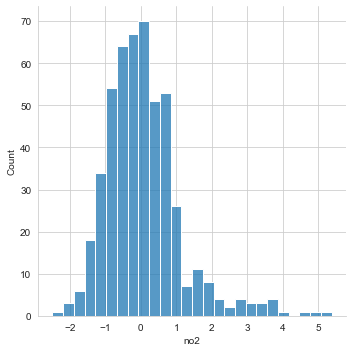

In [177]:
sns.displot(Y_test-y_test_pred)
y_for_gaus=Y_test-y_test_pred

In [178]:
import scipy
scipy.stats.shapiro(y_for_gaus)

ShapiroResult(statistic=0.9105865955352783, pvalue=1.5816040066126671e-16)

In [179]:
print('MAE',metrics.mean_absolute_error(Y_test,y_test_pred))
print('MSE',metrics.mean_squared_error(Y_test,y_test_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,y_test_pred)))

MAE 0.7747053988776353
MSE 1.1622712962823503
RMSE 1.0780868686160454


r-squered for train 0.7461884650380997
r-squered for test 0.7506789024538654
MAE 0.5435272517500255
MSE 0.5900895331305674
RMSE 0.7681728536798


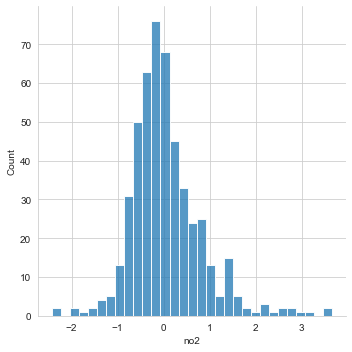

In [180]:
model=RandomForestRegressor(n_estimators=60,min_samples_leaf=5,max_depth=6,n_jobs=1)
model.fit(X_train,Y_train)
print("r-squered for train",model.score(X_train,Y_train))
print("r-squered for test",model.score(X_test,Y_test))
y_test_pred=model.predict(X_test)

sns.displot(Y_test-y_test_pred)
y_for_gaus=Y_test-y_test_pred
scipy.stats.shapiro(y_for_gaus)
print('MAE',metrics.mean_absolute_error(Y_test,y_test_pred))
print('MSE',metrics.mean_squared_error(Y_test,y_test_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,y_test_pred)))

In [181]:
scipy.stats.shapiro(y_for_gaus)

ShapiroResult(statistic=0.9257162809371948, pvalue=5.751273667243184e-15)